# Acknowlegement

In [1]:
#Read before starting: https://towardsdatascience.com/sorry-online-courses-wont-make-you-a-data-scientist-8639d5f00889

# Import necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [4]:
df=pd.read_csv('C:/Users/Jay/Desktop/Python/Projects/ChocolateBarAnalysis/Chocolate-Bar-Analysis-master/Chocolate-Bar-Analysis-master/Dataset/flavors_of_cacao.csv')

df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Cleaning data

## Rename Columns

In [5]:
df.columns

#col names have \n character which can be removed

#update index name/col name: https://note.nkmk.me/en/python-pandas-dataframe-rename/

df.rename(columns=lambda s: s.replace('\n',''), inplace=True)
df.columns

#Hard coding company 
df=df.rename(columns={'Company\xa0(Maker-if known)': 'Company'})

## Checking missing values

In [6]:
df.head()

df.isnull().sum()

#only 2 cols have single missing values

df['BeanType'].value_counts()

#but on checking bean type we get to know that a lot of values are spaces. Updating that to None

df['BeanType']=df['BeanType'].replace('','None')
#this does not work as it is not merely spaces, the value is coded as 'xa0' which can be checked using below

list(df['BeanType'][0:10])

df['BeanType']=df['BeanType'].replace('\xa0','None')

df['BeanType'].value_counts()

#dropping null value from both cols
df.dropna(inplace=True)

#Converting cocoa percent 
df['CocoaPercent']=df['CocoaPercent'].str.replace('%','').astype(float)/100

df.head()

,Company,Specific Bean Originor Bar Name,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Broad BeanOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,None,Peru


# Plotting 

## Q1: The Effect of Time - How did the Quality of Chocolate change over the years?

In [6]:
#relplot [relative plots] are used in seaborn to find the relation between 2 continuous variables 
#common relplots are scatter and line 

Text(0.5, 1, 'Change in cocoa percent over time')

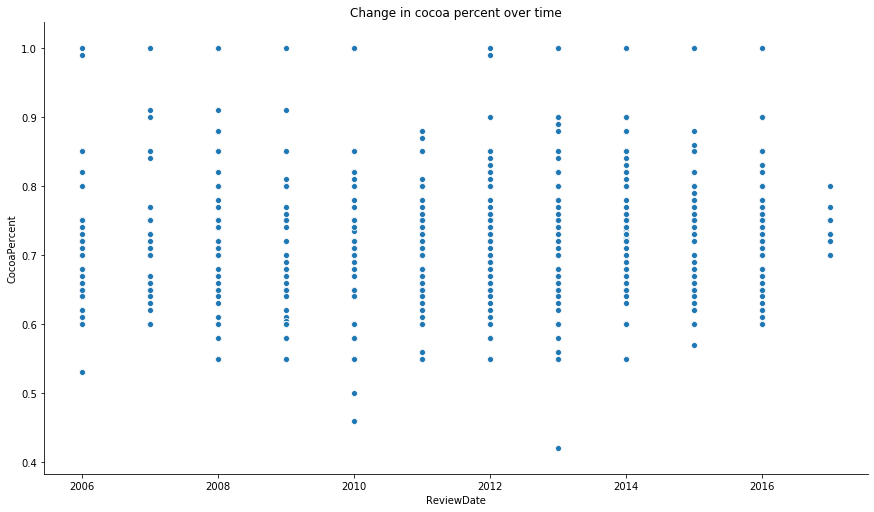

In [7]:
#scatter plot does not help in gathering much info from the data 
sns.relplot(x='ReviewDate', y='CocoaPercent', data=df, kind='scatter',height=7, aspect=7/4)
plt.title('Change in cocoa percent over time')

Text(0.5, 1, 'Change in cocoa percent over time')

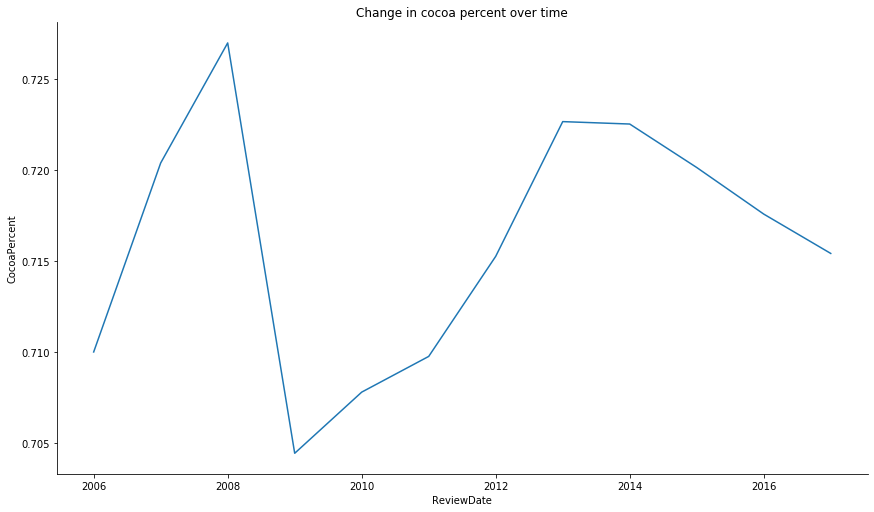

In [8]:
#thus, we use line plot for better understanding, each point of the line represents the mean of the cocoa percent value
#for the respective year 
#ci represents the confidence intervals [default 95%] which can be removed by using ci=none 
sns.relplot(x='ReviewDate', y='CocoaPercent', data=df, kind='line',height=7, aspect=7/4, ci=None)
plt.title('Change in cocoa percent over time')

### Reading:

1. Percentage was lowest in 2009 (approx 69%)
2. It was highest in 2008 (approx 73%)
3. After 2009, percentage was constantly increasing until 2014, after which there is a decline 

## Q2: How has rating changed over time ? 

Text(0.5, 1, 'Change in rating over time')

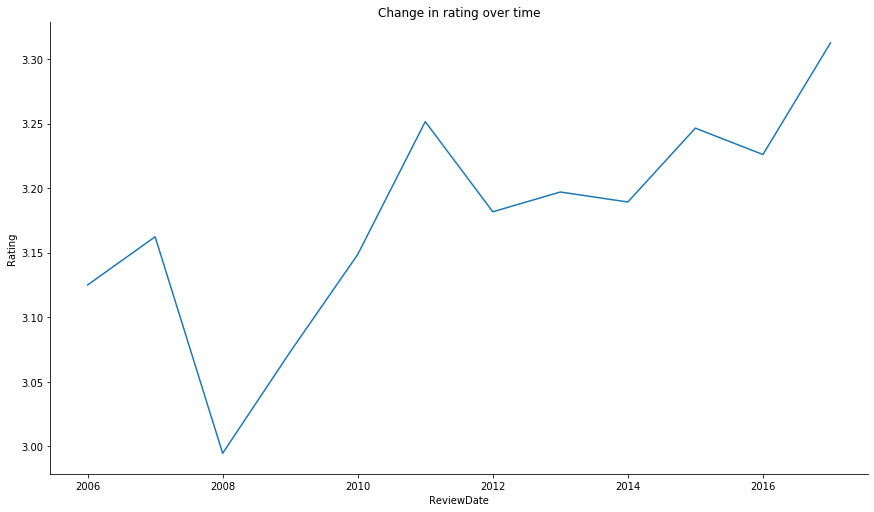

In [9]:
sns.relplot(x='ReviewDate', y='Rating', data=df, kind='line',height=7, aspect=7/4, ci=None)
plt.title('Change in rating over time')

### Reading:

1. Rating was lowest in 2008 (less than 3)
2. It was highest in 2016 (3.35)
3. From 2011 to 2017 there have been many fluctuations in the rating 

## Q3: The best companies? 

In [10]:
df.head()

,Company,Specific Bean Originor Bar Name,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Broad BeanOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,None,Peru


In [11]:
#the understanding is - the best company will have best ratings

d1=pd.DataFrame(df.groupby(['Company']).Rating.mean().sort_values(ascending=False).head())

s=pd.Series([1,2,3,4,5])
d1.set_index(s, inplace=True)
d1.index

d1['Company']=['Tobago Estate (Pralus)', 'Heirloom Cacao Preservation (Zokoko)',
       'Ocelot', 'Amedei', 'Matale']
d1

,Rating,Company
1,4.000000,Tobago Estate (Pralus)
2,3.875000,Heirloom Cacao Preservation (Zokoko)
3,3.875000,Ocelot
4,3.846154,Amedei
5,3.812500,Matale


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

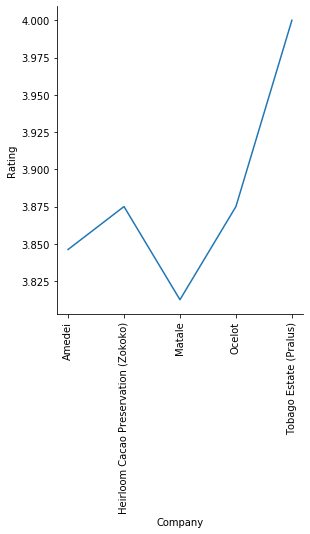

In [12]:
sns.relplot(x='Company', y='Rating', data=d1, kind='line')
plt.xticks(rotation=90)

### Reading:

1. Max rating of 4 is for Tobago Estate
2. HCP (Zokoko) and Ocelot have the smae rating of 3.87
3. Top5 ratings vary from 3.81 to 4 with a very small difference between them

## Check data according to company location 

In [13]:
d1=df.pivot_table(df, index='CompanyLocation').sort_values(by='Rating',ascending=False).head(15)
d1.reset_index(inplace=True)
d1

,CompanyLocation,CocoaPercent,REF,Rating,ReviewDate
0,Chile,0.700000,1638.000000,3.750000,2015.000000
1,Amsterdam,0.732500,1569.500000,3.500000,2015.000000
2,Netherlands,0.700000,1944.000000,3.500000,2017.000000
3,Philippines,0.650000,1121.000000,3.500000,2013.000000
4,Iceland,0.686667,1436.666667,3.416667,2014.666667
5,Vietnam,0.745455,1097.636364,3.409091,2012.818182
6,Brazil,0.698235,1100.470588,3.397059,2012.823529
7,Poland,0.718750,1213.750000,3.375000,2013.500000
8,Australia,0.702245,1378.448980,3.357143,2014.040816
9,Guatemala,0.702000,813.900000,3.350000,2011.300000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

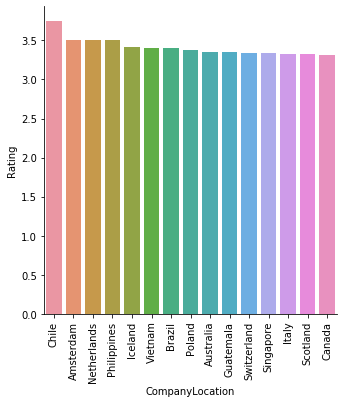

In [14]:
sns.catplot(x='CompanyLocation', y='Rating', data=d1, kind='bar')
plt.xticks(rotation=90)

### Reading:

    1. The highest cocoa concentration is for Vietnam and the lowest for Phillipines which differ by a small margin
    2. The highest rated chocolate is present in Chile

## Checking data for one company: Soma

In [15]:
df['Company'].value_counts()

Soma         46
Bonnat       27
Fresco       26
Pralus       25
A. Morin     23
             ..
Shattell      1
Heilemann     1
Durand        1
Nanea         1
Chocosol      1
Name: Company, Length: 416, dtype: int64

In [16]:
d2=df[df['Company'] == 'Soma']
d2.head()

,Company,Specific Bean Originor Bar Name,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Broad BeanOrigin
1507,Soma,"Oko Caribe, Duarte P., Collab w Chocosol",1820,2016,0.62,Canada,3.50,None,Domincan Republic
1508,Soma,"Sambirano Valley, Black Science, B-60307.0",1820,2016,0.70,Canada,3.50,Trinitario,Madagascar
1509,Soma,"Bahia Black, batch bra50722.1",1828,2016,0.70,Canada,3.50,Forastero (Parazinho),Brazil
1510,Soma,"Abstract S. w/ Jamaica nibs,batch abs60323.0",1828,2016,0.75,Canada,3.75,None,"Ven.,Ecu.,Peru,Nic."
1511,Soma,"Chuno, San Jose de Bocay, Pantasma R.,B.S.",1828,2016,0.70,Canada,3.75,Trinitario,Nicaragua


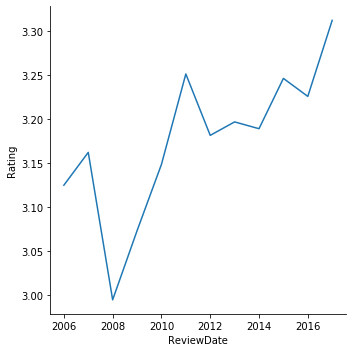

In [17]:
#checking rating change over the years 
sns.relplot(x='ReviewDate', y='Rating', data=df, kind='line', ci=None)

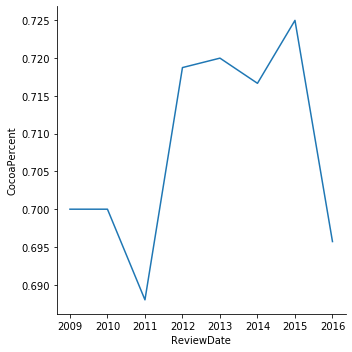

In [18]:
sns.relplot(x='ReviewDate' , y='CocoaPercent', data=d2, kind='line', ci=None)